# Übungsblatt 7


In [91]:
import numpy as np
import matplotlib.pyplot as plt 
import math 
from objdict import ObjDict
from FEMesh import *
from functions import *
import scipy.sparse as sp

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Aufgabe 1.1

Implementieren Sie die Funktion: 

function [K, r] = applyDirichletBCs(dofs, K, r)

mit der das lineare Gleichungssystem so modi ziert wird, dass die Lösungen für die
Freiheitsgrade in dofs gleich null sind.

In [92]:
#def applyDirichletBCs(dofs, K, r):
#    K[dofs, :] = 0
#    np.fill_diagonal(K[:, dofs], 1)
#     r[dofs] = 0

def applyDirichletBCs(dofs, K, r):
    K[dofs] = 0
    K[dofs, :] = 0
    K[dofs,dofs] = 1

K = np.arange(1, 26).reshape(5, 5)
r = np.arange(1, 6)

print('Vorher')
print('K =\n', K)
print('r =\n', r)

applyDirichletBCs([1, 3], K, r)

print('Nachher')
print('K =\n', K)
print('r =\n', r)

Vorher
K =
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
r =
 [1 2 3 4 5]
Nachher
K =
 [[ 1  2  3  4  5]
 [ 0  1  0  0  0]
 [11 12 13 14 15]
 [ 0  0  0  1  0]
 [21 22 23 24 25]]
r =
 [1 2 3 4 5]


## Aufgabe 1.2

Siehe Ordner gmsh

## Aufgabe 1.3

Berechnen Sie in der Datei 'heat plate.mlx' die Näherungslösung der Temperaturverteilung
für die Kreisplatte (Parameter   und w frei gewählt). Vergleichen Sie die
maximale Temperatur mit der exakten Lösung

Tipp: Die Funktion assembleKr von Übungsblatt 4 sollte auch für das Wärmeleitungsproblem
funktionieren. Mit den Attributen Nn und Ne der Mesh-Klasse lässt sich der
Code ggf. noch übersichtlicher schreiben.

Theta Max FEM = 3.87933406045358
Theta Max Exakt = 3.8161538461538465
Error = 0.06318021429973353


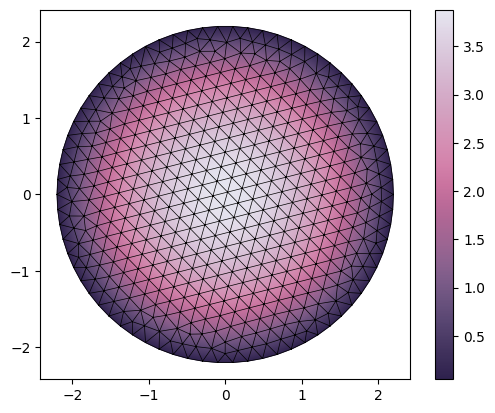

In [98]:
from functions import heatKe
from functions import heatRe
from functions import assembleKr

m1_f = ObjDict()


m1 = readmsh('gmsh/heat disk.msh')
#m1.plot()

lambder = 1.3
w = 4.1
rad = 2.2

m1.p.keFunc = heatKe(lambder)
m1.p.reFunc = heatRe(w)

K, r = assembleKr_gmsh(m1)
applyDirichletBCs(m1.edgeNodeIDs, K, r)

#KSparse = sp.csr_matrix(K)

thetaHat = np.linalg.solve(K,r)

m1.plot(thetaHat)

thetaHat_max = max(thetaHat)
thetamax = (w * (rad**2)) / (4 * lambder)
error = thetaHat_max - thetamax

print('Theta Max FEM =', thetaHat_max)
print('Theta Max Exakt =', thetamax)
print('Error =', error)



## Aufgabe 1.4

function plotNodalSolution(mesh, values)

um auf dem Netz mesh die Näherungslösung in values zu plotten. Verwenden Sie die
Matlab-Funktion patch (In der Dokumentation gibt es ein Beispiel, das Sie (fast) 1:1
übernehmen können).

Plotten Sie damit die Temperaturverteilung der aus Aufgabe 1.4.
Zusatzaufgabe: Mithilfe der Funktion der Temperaturverteilung (Notizen zur Vorlesung)
können Sie die exakte Lösung in den Knotenpunkten berechnen und damit den Diskretisierungsfehler
plotten. 

8


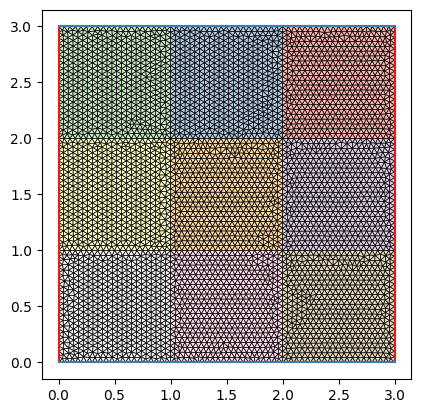

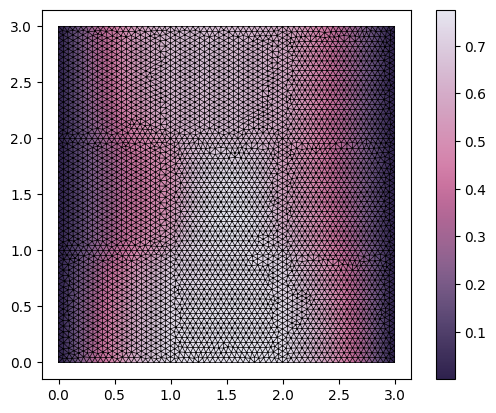

In [97]:
m2 = readmsh('gmsh/aufgabe1_5.msh')
m2.plot()

m2.groups.s1.p.keFunc = heatKe(1)
m2.groups.s2.p.keFunc = heatKe(5)
m2.groups.s3.p.keFunc = heatKe(1)
m2.groups.s4.p.keFunc = heatKe(3)
m2.groups.s5.p.keFunc = heatKe(0.5)
m2.groups.s6.p.keFunc = heatKe(2) 
m2.groups.s7.p.keFunc = heatKe(1) 
m2.groups.s8.p.keFunc = heatKe(4) 
m2.groups.s9.p.keFunc = heatKe(2) 

m2.groups.faces.p.reFunc = heatRe(1)

K,r = assembleKr_gmsh_complex(m2)

applyDirichletBCs(m2.groups.rD.nodeIDs, K, r)

KSparse = sp.csr_matrix(K)

thetaHat = np.linalg.solve(K,r)

print(K.itemsize)

m2.plot(thetaHat)

m = readmsh('gmsh/complex.msh')
m.plot()